#  Test on the real PIV cases
- Author: Yong Lee (yongli.cv@gmail.com)
- Date: Sep 1st, 2021

10_pc     	outlier number:	  291
10_spof   	outlier number:	  144
10_cfcc   	outlier number:	  421
10_scc    	outlier number:	   98
10_rpc    	outlier number:	  263
10_sbcc_b1	outlier number:	  227
10_sbcc_b2	outlier number:	  203
10_sbcc_b3	outlier number:	   87
10_sbcc   	outlier number:	   60


9_pc      	outlier number:	   11
9_spof    	outlier number:	    5
9_cfcc    	outlier number:	  123
9_scc     	outlier number:	    8
9_rpc     	outlier number:	   64
9_sbcc_b1 	outlier number:	   58
9_sbcc_b2 	outlier number:	   59
9_sbcc_b3 	outlier number:	   22
9_sbcc    	outlier number:	    5


12_pc     	outlier number:	    8
12_spof   	outlier number:	    1
12_cfcc   	outlier number:	   16
12_scc    	outlier number:	    3


/home/yong/miniconda3/envs/venv/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  from ipykernel import kernelapp as app


12_rpc    	outlier number:	    5
12_sbcc_b1	outlier number:	    3
12_sbcc_b2	outlier number:	    3
12_sbcc_b3	outlier number:	    3
12_sbcc   	outlier number:	    2




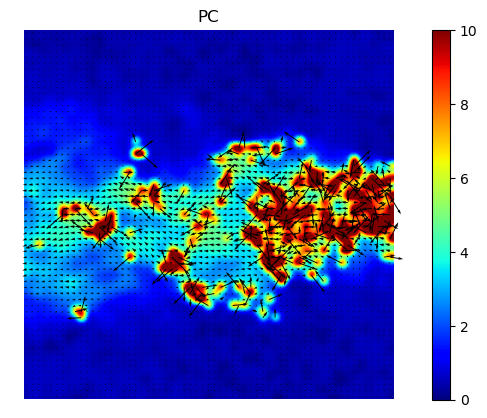

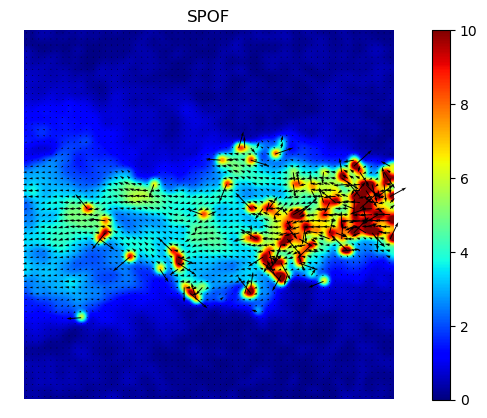

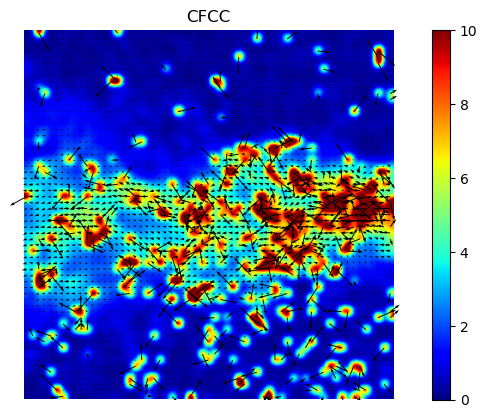

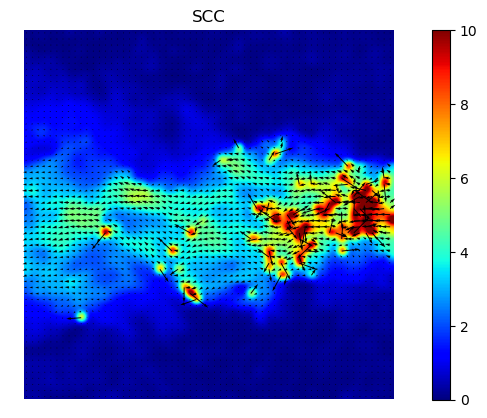

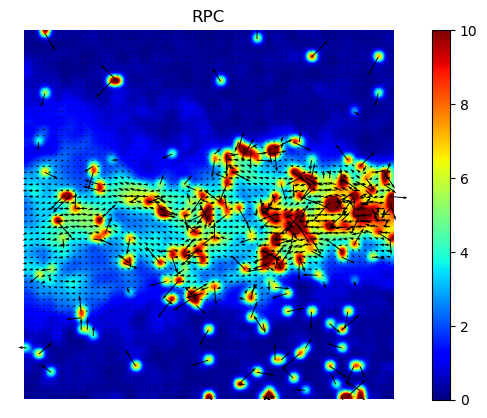

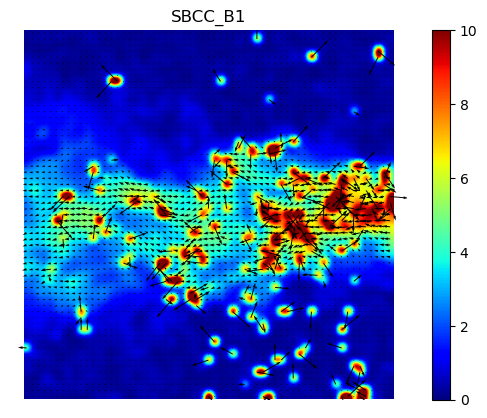

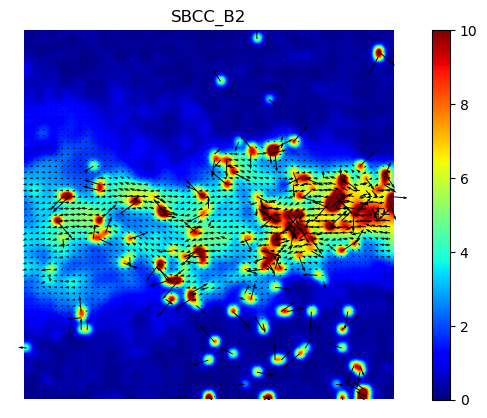

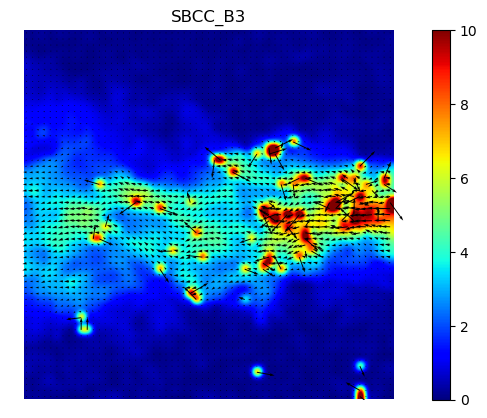

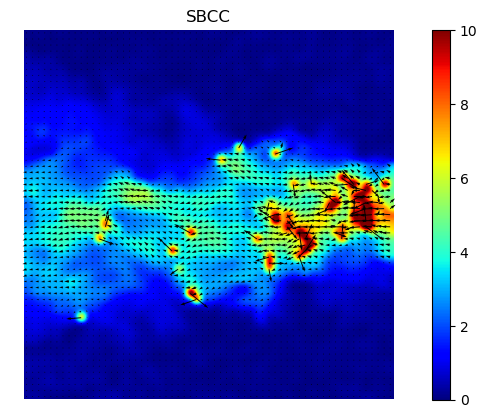

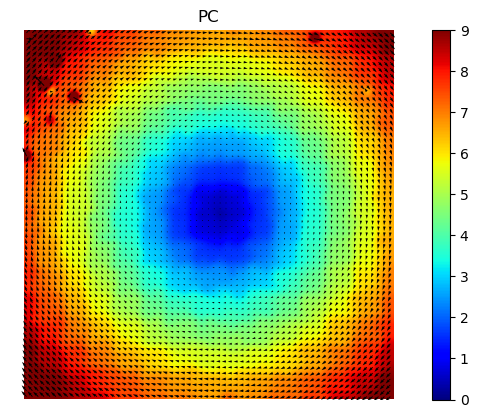

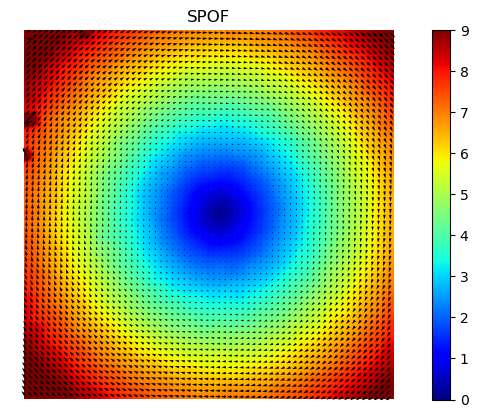

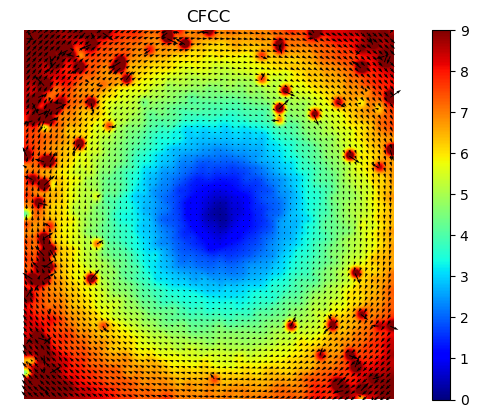

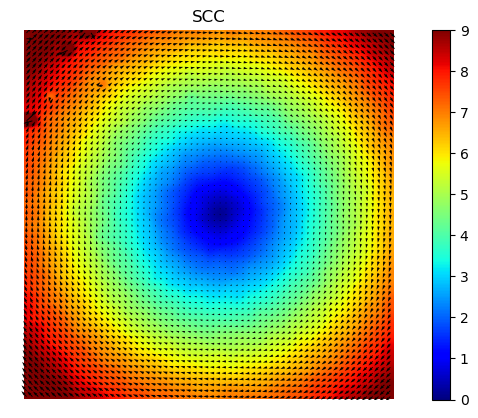

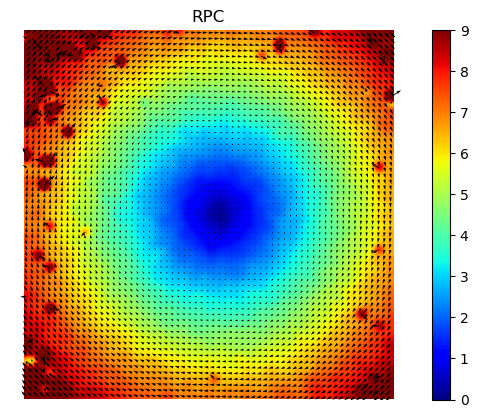

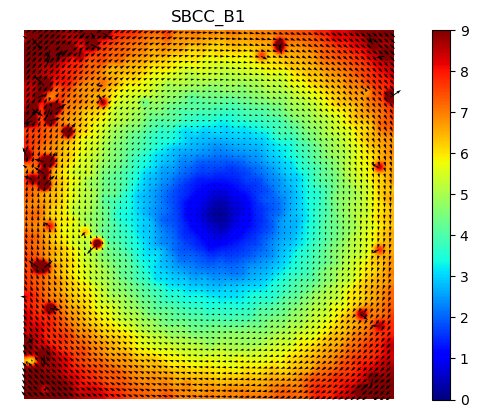

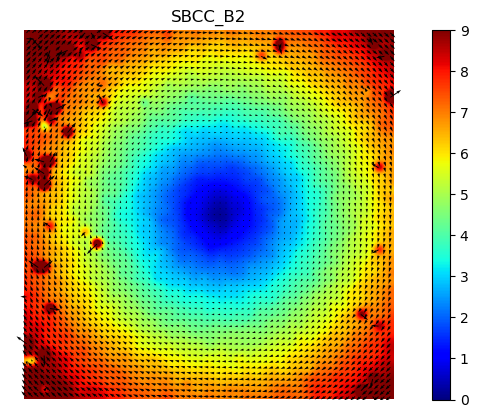

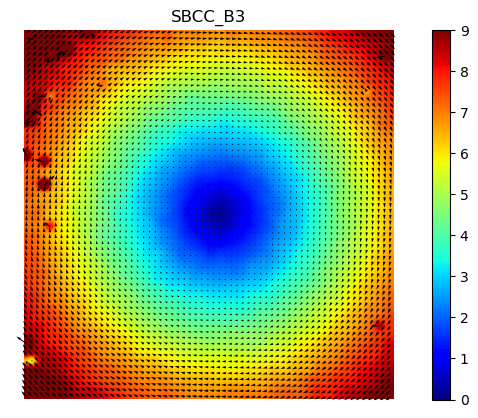

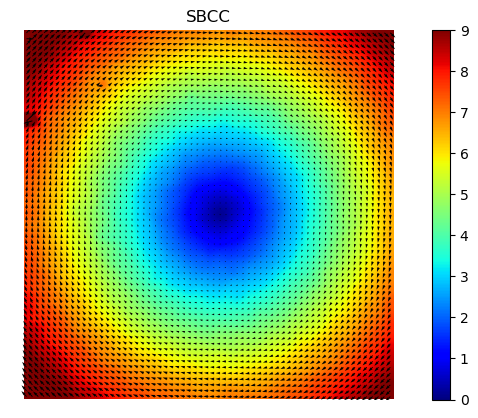

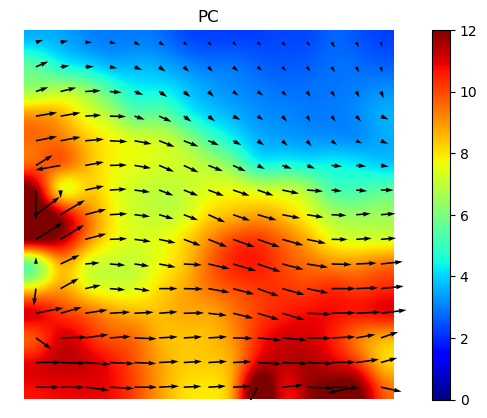

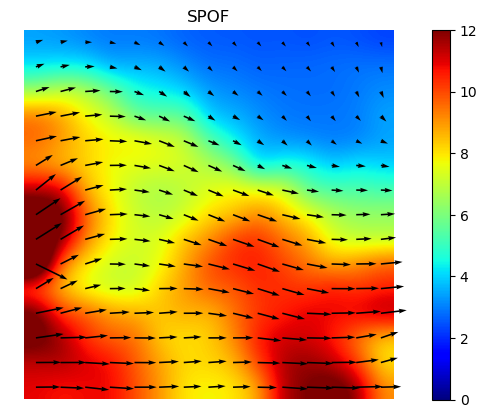

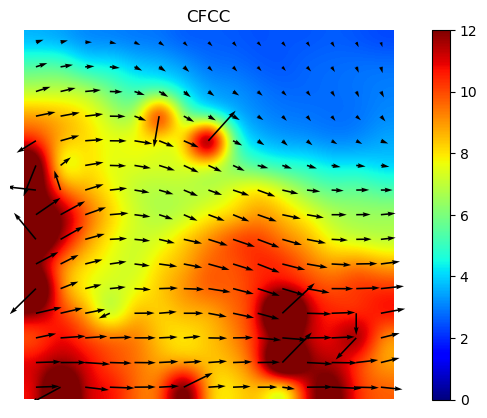

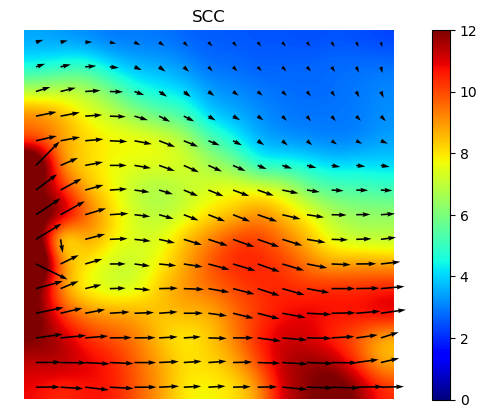

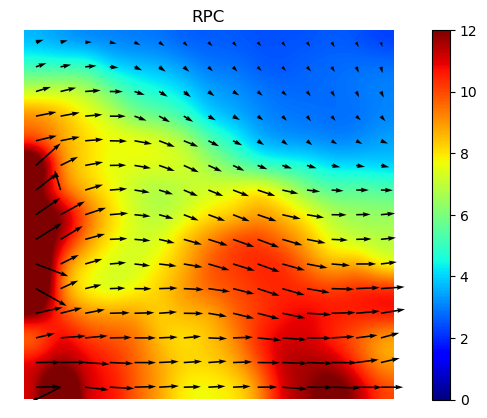

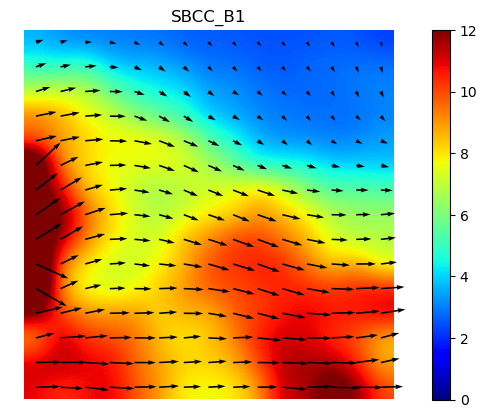

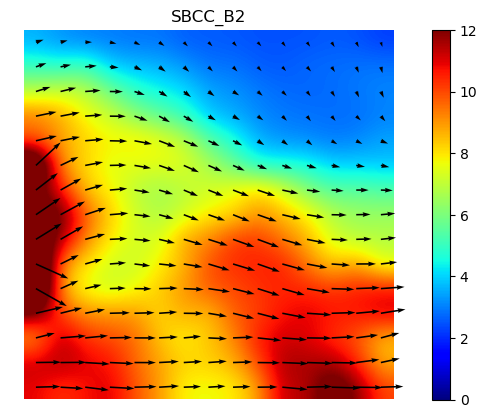

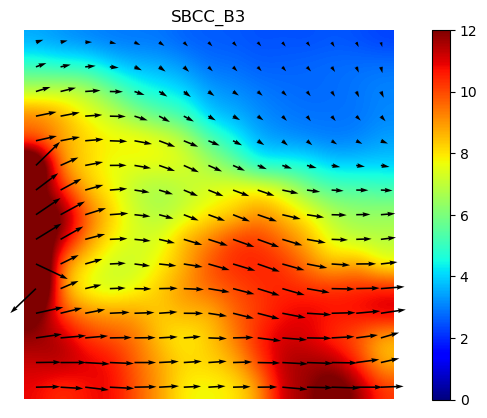

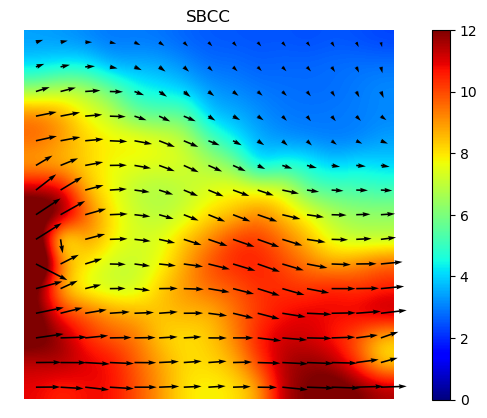

In [1]:
import numpy as np
import cv2
from piv import PIV
import matplotlib.pyplot as plt
from utils import tool
from utils.outlier import NMT
from utils.plot import plot_cc_map
"""One-pass analysis for PIV with different CC methods"""


def plot_field(u, v, method, v_min=0.0, v_max=12.0):
    u =-u.transpose()
    v = v.transpose()
    amp = np.sqrt(u**2+v**2)
    fig = plt.figure()
    plt.imshow(amp, cmap='jet', interpolation='bicubic', vmin=v_min, vmax=v_max)
    ax = fig.gca()
    ax.quiver(u,v, scale=800/(v_max-7.5)) 
    ax.set_title(method)
    ax.axis('equal')
    ax.axis('off')
    plt.colorbar()
    return fig


def main():
    image_lists = [ ['./TestImages/2a.tif', './TestImages/2b.tif'],
            ['./TestImages/F_00001.bmp', './TestImages/F_00002.bmp'],
            ['./TestImages/5a_piv01_1.bmp', './TestImages/5b_piv01_2.bmp']]
    v_max_list = [10, 9, 12, 12, 10] # for visualization control, max value for the vector amplitude 

    method_list  =['pc', 'spof', 'cfcc', 'scc', 'rpc', 'sbcc_b1', 'sbcc_b2', 'sbcc_b3', 'sbcc']
    
    # config for piv 
    config = tool.AttrDict()
    config.win_sz = [32,32]
    config.step_sz =[16,16]
    config.subpixel='gaussian'
    # config.runs= 1 # One-pass method, you also can test the multi-pass method with image deformation

    for k, (file_path, v_max) in enumerate(zip(image_lists, v_max_list)):
        image1 = cv2.imread(file_path[0], 0)
        image2 = cv2.imread(file_path[1], 0)

        # get the "truth" reference for outlier identification
        config.runs = 3
        config.method = 'scc'
        piv = PIV(config)
        u_t, v_t, r_map= piv.compute(image1, image2)
        u_t, v_t, index = NMT(u_t,v_t) # save the data to generate truth, please make config.runs=3

        for method in method_list:
            info = f"{v_max}_{method}"

            config.method = method
            config.runs = 1
            piv = PIV(config)

            u, v, r_map= piv.compute(image1, image2)
            
            cri = np.sqrt(np.square(u-u_t) + np.square(v-v_t)) > 4
            print(f"{info:10s}\toutlier number:\t {np.sum(cri):4d}")

            fig = plot_field(u,v,method.upper(), v_max=v_max)
            fig.savefig('output/Figx_'+info+".svg")
            fig.savefig('output/Figx_'+info+".pdf")
            # plt.close()
        print('\n')

    plt.show()
main()
